In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


(1) Expecting CPI alone

In [64]:
### read CPI.csv file and make a data frame
df = pd.read_csv('CPI.csv', parse_dates=True)
# df.head()

# ### check the index column of data frame
# df.index

# ### calculate mean by monthly basis
# df_mean = df.resample('M').mean()
# df_mean.head()

df['date_processed'] = pd.to_datetime(df['date'])
# df.head()

df['year'] = df['date_processed'].dt.year
df['month'] = df['date_processed'].dt.month
# df.head()

df_mean_by_month = pd.DataFrame(pd.pivot_table(data=df, index = ['year', 'month'], values = 'CPI', aggfunc = 'mean'))
df_mean_by_month.head()


CPI
year month           
2008 7      100.00000
     8      100.52510
     9      100.12380
     10      99.98538
     11      98.97539

c:\Users\shin\anaconda3\envs\6.86x\lib\site-packages\pandas\core\indexes\range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
c:\Users\shin\anaconda3\envs\6.86x\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\shin\anaconda3\envs\6.86x\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


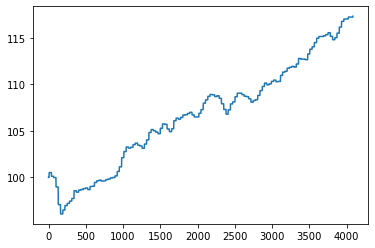

In [65]:
plt.plot(df.index, df['CPI'])


In [71]:
### Get the 'CPI' column from data frame and make it into numpy array
arr_CPI = df['CPI'].values
arr_CPI = arr_CPI.reshape(-1, 1)
print(arr_CPI.shape)

### If arr_CPI contains NaN, then remove the row with NaN
arr_CPI = np.nan_to_num(arr_CPI)

### get the index of data frame by monthly basis and make it into numpy array
arr_index = df.index.values
# print(arr_index)

### change date format to int in arr_index
arr_index = np.array(arr_index, dtype='int64')
arr_index = arr_index
arr_index = arr_index.reshape(-1, 1)
print(arr_index.shape)
print(arr_index)

arr_index = np.nan_to_num(arr_index)


(4122, 1)
(4122, 1)
[[   0]
 [   1]
 [   2]
 ...
 [4119]
 [4120]
 [4121]]


In [72]:
reg = LinearRegression()
reg.fit(arr_index, arr_CPI)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
reg.coef_

array([[0.00325341]])

In [74]:
reg.intercept_

array([99.12196055])